In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# CNN - 1
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a second convolutional layer ( CNN - 2)
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening Layer 
classifier.add(Flatten())

# Step 4 - Full connection  ( Neural Network)
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Files for GitHub/Retinopathy data/Training Set',
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 1,
                                                 class_mode = 'binary') 

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Files for GitHub/Retinopathy data/Testing Set',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')


Found 240 images belonging to 5 classes.
Found 121 images belonging to 5 classes.


In [6]:
training_set.class_indices

{'1. Microaneurysms': 0,
 '2. Haemorrhages': 1,
 '3. Hard Exudates': 2,
 '4. Soft Exudates': 3,
 '5. Optic Disc': 4}

In [7]:
import warnings 
warnings.filterwarnings("ignore")

In [8]:
result=classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
240/240 [==============================] - 235s 971ms/step - loss: -283.1435 - accuracy: 0.2167 - val_loss: -1631.3979 - val_accuracy: 0.2231
Epoch 2/10
240/240 [==============================] - 31s 130ms/step - loss: -14163.0801 - accuracy: 0.2208 - val_loss: -41129.6367 - val_accuracy: 0.2231
Epoch 3/10
240/240 [==============================] - 31s 129ms/step - loss: -109863.5078 - accuracy: 0.2208 - val_loss: -230402.7500 - val_accuracy: 0.2231
Epoch 4/10
240/240 [==============================] - 30s 124ms/step - loss: -411034.8125 - accuracy: 0.2208 - val_loss: -717156.9375 - val_accuracy: 0.2231
Epoch 5/10
240/240 [==============================] - 30s 123ms/step - loss: -1076014.3750 - accuracy: 0.2208 - val_loss: -1703808.7500 - val_accuracy: 0.2231
Epoch 6/10
240/240 [==============================] - 30s 124ms/step - loss: -2280168.5000 - accuracy: 0.2208 - val_loss: -3267777.5000 - val_accuracy: 0.2231
Epoch 7/10
240/240 [==============================] - 30s 12

In [9]:
classifier.save('Diabetic_Retinopathy.h5')

In [10]:
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [46]:

!pip install -q keras
!pip install tensorflow
import tensorflow as tf
import tensorflow.keras.utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
model=load_model("Diabetic_Retinopathy.h5")

In [49]:
from keras.utils import load_img

def model_output (path):
    raw_img = load_img(path,target_size=(64,64))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = tensorflow.keras.utils.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if Probability <= 0.2 :
        print("its microaneurysms")
    elif Probability >0.2 and Probability <= 0.4: 
        print("its mild")
    elif Probability >0.4 and Probability <= 0.6: 
        print("its Moderate")
    elif Probability >0.6 and Probability <= 0.8: 
        print("its Severe")
    else:
        print("its PDR")

In [50]:
import os 
os.chdir(r"/content/drive/MyDrive/Files for GitHub/Retinopathy data/Live data")

1/1 [==============================] - 0s 135ms/step
Probability 1.0
its PDR


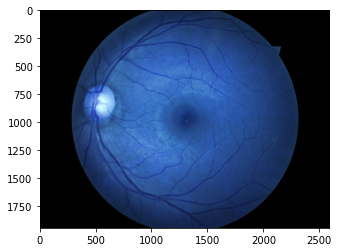

In [51]:
model_output("13_left.jpeg")